## Riksdagen P1204  
version 1.2

Egenskap i Wikidata som bör bytas till GUID P8388
* [denna notebook](https://github.com/salgo60/open-data-examples/blob/master/Riksdagen%20P1214.ipynb)
  * video [20201216 om denna notebook](https://youtu.be/BK7Cx0-s7Oo)
* [diskussion P1214](https://www.wikidata.org/wiki/Property_talk:P1214#Repair_needed) 
* egenskapsförslag [Wikidata:Property_proposal/Riksdagen_person_guid](https://www.wikidata.org/wiki/Wikidata:Property_proposal/Riksdagen_person_guid)
* [Riksdagensdata 1991 poster](http://data.riksdagen.se/personlista/?iid=&fnamn=&enamn=&f_ar=&kn=&parti=&valkrets=&rdlstatus=samtliga&org=&utformat=json&sort=sorteringsnamn&sortorder=asc&termlista=) 2020 jun
  * 2020-12-16 [2006 poster](http://data.riksdagen.se/personlista/?iid=&fnamn=&enamn=&f_ar=&kn=&parti=&valkrets=&rdlstatus=samtliga&org=&utformat=json&sort=sorteringsnamn&sortorder=asc&termlista=)

In [1]:
from datetime import datetime
start_time  = datetime.now()
print("Last run: ", start_time)

In [2]:
import urllib3, json
import pandas as pd 
http = urllib3.PoolManager() 
pd.set_option("display.max.columns", None) 
 
url = "http://data.riksdagen.se/personlista/?iid=&fnamn=&enamn=&f_ar=&kn=&parti=&valkrets=&rdlstatus=samtliga&org=&utformat=json&sort=sorteringsnamn&sortorder=asc&termlista="
r = http.request('GET', url)
data = json.loads(r.data)


In [3]:
df = pd.DataFrame(pd.DataFrame(data["personlista"]["person"]))
df.sample(10)

,hangar_guid,sourceid,intressent_id,hangar_id,fodd_ar,kon,efternamn,tilltalsnamn,sorteringsnamn,iort,parti,valkrets,status,person_url_xml,bild_url_80,bild_url_192,bild_url_max,personuppdrag,personuppgift
1227,be24c6d5-b86d-4437-9968-4d5b31543001,0f4bd5bb-67d5-4525-954d-9170b7dece3e,,4788796,0,man,Molander,Bo,"Molander,Bo",,,,Tidigare personlig suppleant i Styrelsen för S...,http://data.riksdagen.se/person/0f4bd5bb-67d5-...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,"{'uppdrag': [{'organ_kod': 'RJ', 'roll_kod': '...",
1746,772908f0-07f5-40e0-a073-e0a2d2c1e6cf,7b535991-36e4-425e-a7ff-cfd4e61ca95d,0706916743101,2341738,1928,kvinna,Söder,Karin,"Söder,Karin",,C,,Avliden 2015-12-19,http://data.riksdagen.se/person/7b535991-36e4-...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,"{'uppdrag': [{'organ_kod': 'kam', 'roll_kod': ...","{'uppgift': [{'kod': 'sv', 'uppgift': ['yrkesv..."
447,e19f6681-5dec-422e-ac6e-a16ba1c118b8,d7c324aa-83e4-11d4-ae60-0050040c9b55,0763673691509,2342334,1945,man,Engqvist,Lars,"Engqvist,Lars",,S,,Tidigare riksdagsledamot,http://data.riksdagen.se/person/d7c324aa-83e4-...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,"{'uppdrag': [{'organ_kod': 'kam', 'roll_kod': ...",
1807,3f5b42c0-d925-4f55-b658-a35e76c15e96,1ba45ff4-cb60-4ac9-b790-04bdb58a4944,0535526562910,2342752,1953,man,Tysklind,Lars,"Tysklind,Lars",,L,Västra Götalands läns västra,Tidigare riksdagsledamot,http://data.riksdagen.se/person/1ba45ff4-cb60-...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,"{'uppdrag': [{'organ_kod': 'L', 'roll_kod': 'K...",{'uppgift': [{'kod': 'Uppdrag inom riksdag och...
1388,360372b4-9d69-4652-9224-46cc934e5e01,d7c3286f-83e4-11d4-ae60-0050040c9b55,0463667731519,2342873,1955,kvinna,Oscarsson,Yvonne,"Oscarsson,Yvonne",,V,Gävleborgs län,Tidigare riksdagsledamot,http://data.riksdagen.se/person/d7c3286f-83e4-...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,"{'uppdrag': [{'organ_kod': 'kam', 'roll_kod': ...","{'uppgift': [{'kod': 'sv', 'uppgift': ['behand..."
1099,05ce3e8d-69f9-4746-8e33-c99e299f409b,25617b2f-2cc7-477a-a872-d1c14e9ef187,0252067342313,2342918,1956,kvinna,Lindestam,Åsa,"Lindestam,Åsa",,S,Gävleborgs län,Förste vice talman (tjänstgörande riksdagsleda...,http://data.riksdagen.se/person/25617b2f-2cc7-...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,"{'uppdrag': [{'organ_kod': 'kam', 'roll_kod': ...",{'uppgift': [{'kod': 'Uppdrag inom riksdag och...
397,ce71a4d4-7e21-466b-ba0a-5e1c26c7b9a3,c759972c-f921-491a-b36d-d9de5858353a,023001325318,2343285,1965,kvinna,Edholm,Lotta,"Edholm,Lotta",,FP,,Tidigare ersättare,http://data.riksdagen.se/person/c759972c-f921-...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,"{'uppdrag': [{'organ_kod': 'kam', 'roll_kod': ...",
1465,67794b74-edc0-449c-9965-58d56970f5dd,ba2d53c0-4f47-45f0-a961-ac265c2b8679,0630824497414,2343485,1971,kvinna,Polfjärd,Jessica,"Polfjärd,Jessica",,M,Västmanlands län,Europaparlamentariker,http://data.riksdagen.se/person/ba2d53c0-4f47-...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,"{'uppdrag': [{'organ_kod': 'M', 'roll_kod': 'G...",{'uppgift': [{'kod': 'Uppdrag inom riksdag och...
1391,8c423ab0-be88-4686-8f68-65b3b4752066,d127d78e-a090-4ce3-899d-

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2006 entries, 0 to 2005
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   hangar_guid     2006 non-null   object
 1   sourceid        2006 non-null   object
 2   intressent_id   2006 non-null   object
 3   hangar_id       2006 non-null   object
 4   fodd_ar         2006 non-null   object
 5   kon             2006 non-null   object
 6   efternamn       2006 non-null   object
 7   tilltalsnamn    2006 non-null   object
 8   sorteringsnamn  2006 non-null   object
 9   iort            2006 non-null   object
 10  parti           2006 non-null   object
 11  valkrets        2006 non-null   object
 12  status          2006 non-null   object
 13  person_url_xml  2006 non-null   object
 14  bild_url_80     2006 non-null   object
 15  bild_url_192    2006 non-null   object
 16  bild_url_max    2006 non-null   object
 17  personuppdrag   2006 non-null   object
 18  personup

Det som skall bytas är  
* intressent_id e.g.  0758652610 
* till sourceid e.g 83345459-cc17-4d4a-b2bb-3748a0f3721c


In [5]:
#for index, row in df.iterrows(): 
#    print (row["tilltalsnamn"], " ", row["efternamn"], "|",  
#           row["intressent_id"],"|", row["sourceid"], "|" ,row["fodd_ar"], "|" ,row["parti"] )

In [6]:
df.describe()

,hangar_guid,sourceid,intressent_id,hangar_id,fodd_ar,kon,efternamn,tilltalsnamn,sorteringsnamn,iort,parti,valkrets,status,person_url_xml,bild_url_80,bild_url_192,bild_url_max,personuppdrag,personuppgift
count,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006
unique,2006,2006,1884,2006,84,3,1425,733,1983,19,15,30,207,2006,2006,2006,2006,2006,1716
top,15c8b77b-8912-4f88-8ce6-f2feb928bbb3,d7c32790-83e4-11d4-ae60-0050040c9b55,,2342804,0,man,Andersson,Lars,"Andersson,Anders",,S,,Tidigare riksdagsledamot,http://data.riksdagen.se/person/58a2e792-4509-...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,"{'uppdrag': [{'organ_kod': 'Systembolaget', 'r...",
freq,1,1,123,1,123,1115,49,46,2,1987,637,842,1032,1,1,1,1,1,291


In [7]:
#df.isnull() 

In [8]:
df.describe()

,hangar_guid,sourceid,intressent_id,hangar_id,fodd_ar,kon,efternamn,tilltalsnamn,sorteringsnamn,iort,parti,valkrets,status,person_url_xml,bild_url_80,bild_url_192,bild_url_max,personuppdrag,personuppgift
count,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006
unique,2006,2006,1884,2006,84,3,1425,733,1983,19,15,30,207,2006,2006,2006,2006,2006,1716
top,15c8b77b-8912-4f88-8ce6-f2feb928bbb3,d7c32790-83e4-11d4-ae60-0050040c9b55,,2342804,0,man,Andersson,Lars,"Andersson,Anders",,S,,Tidigare riksdagsledamot,http://data.riksdagen.se/person/58a2e792-4509-...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,"{'uppdrag': [{'organ_kod': 'Systembolaget', 'r...",
freq,1,1,123,1,123,1115,49,46,2,1987,637,842,1032,1,1,1,1,1,291


In [9]:
df.parti.unique()

array(['MP', 'L', 'M', 'S', '', 'KD', 'FP', '-', 'C', 'SD', 'PP', 'V',
       'NYD', 'JL', 'FI'], dtype=object)

In [10]:
df.parti.value_counts()

S      637
M      400
C      157
V      133
FP     129
MP     128
       121
KD     116
SD      90
L       45
NYD     24
-       20
JL       3
PP       2
FI       1
Name: parti, dtype: int64

In [11]:
df[df["parti"] == '-']

,hangar_guid,sourceid,intressent_id,hangar_id,fodd_ar,kon,efternamn,tilltalsnamn,sorteringsnamn,iort,parti,valkrets,status,person_url_xml,bild_url_80,bild_url_192,bild_url_max,personuppdrag,personuppgift
17,3dc35801-6647-4979-a712-1570ff19f185,291f0b9f-45e2-4554-ab3d-206e276f2846,0599390849728,3057277,1987,man,Ahl,Jeff,"Ahl,Jeff",,-,Hallands län,Tidigare riksdagsledamot,http://data.riksdagen.se/person/291f0b9f-45e2-...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,"{'uppdrag': [{'organ_kod': 'kam', 'roll_kod': ...",{'uppgift': [{'kod': 'Uppdrag inom riksdag och...
78,2bf1ec39-4624-482b-8605-78ba0d1584d6,da0f2189-a8ae-4812-bf5b-bab23afa738b,0817420987900,2341996,1938,man,Andersson,John,"Andersson,John",,-,,Tidigare riksdagsledamot,http://data.riksdagen.se/person/da0f2189-a8ae-...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,"{'uppdrag': [{'organ_kod': 'kam', 'roll_kod': ...","{'uppgift': [{'kod': 'en', 'uppgift': [{}], 't..."
97,b5b961cf-bd1d-4238-b2a2-87039574a890,d7c317d9-83e4-11d4-ae60-0050040c9b55,0892012091809,2342198,1943,man,Andersson,Sten,"Andersson,Sten",,-,,Tidigare riksdagsledamot,http://data.riksdagen.se/person/d7c317d9-83e4-...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,"{'uppdrag': [{'organ_kod': 'kam', 'roll_kod': ...","{'uppgift': [{'kod': 'sv', 'uppgift': ['byggna..."
274,cdc4320c-6742-4146-9d9a-c2b1c3ae0aec,c93800eb-8db0-44fb-acc4-868d24527a63,049679140507,2341885,1935,man,Brohult,Johan,"Brohult,Johan",,-,,Tidigare riksdagsledamot,http://data.riksdagen.se/person/c93800eb-8db0-...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,"{'uppdrag': [{'organ_kod': 'kam', 'roll_kod': ...",
305,5b025fbe-995b-489e-b4f5-436b9a94f960,8340e89d-250a-4300-bab5-6937399ee277,0737073162411,2343464,1970,kvinna,Carlsson Löfdahl,Emma,"Carlsson Löfdahl,Emma",,-,Jönköpings län,Tjänstgörande riksdagsledamot,http://data.riksdagen.se/person/8340e89d-250a-...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,"{'uppdrag': [{'organ_kod': 'L', 'roll_kod': 'K...",{'uppgift': [{'kod': 'Uppdrag inom riksdag och...
513,faf50af6-b9c6-427f-92bd-58fbe0b68374,eb4a2005-9ec1-45c0-9f63-3e4ffdc4f04e,046426524512,3057163,1953,man,Felten,Olle,"Felten,Olle",,-,Södermanlands län,Tidigare riksdagsledamot,http://data.riksdagen.se/person/eb4a2005-9ec1-...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,"{'uppdrag': [{'organ_kod': 'kam', 'roll_kod': ...",{'uppgift': [{'kod': 'Uppdrag inom riksdag och...
580,74b879f9-19e4-400c-88f4-8402f3d17653,a8568101-4108-42b7-8dd6-f14665dfa9ac,0504711999229,2858135,1989,man,Gamov,Pavel,"Gamov,Pavel",,-,Skåne läns södra,Tidigare riksdagsledamot,http://data.riksdagen.se/person/a8568101-4108-...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,"{'uppdrag': [{'organ_kod': 'kam', 'roll_kod': ...",{'uppgift': [{'kod': 'Uppdrag inom riksdag och...
627,dc0dc4dc-1049-4894-8e18-aa1d01946a5b,1f0d91c1-605d-4b20-9825-fb8ee5373dcb,0697941234716,2369368,1964,kvinna,Gunsdotter,Margareta,"Gunsdotter,Margareta",,-,Västra Götalands läns östra,Tidigare riksdagsledamot,http://data.riksdagen.se/person/1f0d91c1-605d-...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,"{'uppdrag': [{'organ_kod': 'kam', 'roll_kod': ...",{'uppgift': [{'kod': 'U

In [12]:
df[df["parti"] == 'JL'] # Junilistan 

,hangar_guid,sourceid,intressent_id,hangar_id,fodd_ar,kon,efternamn,tilltalsnamn,sorteringsnamn,iort,parti,valkrets,status,person_url_xml,bild_url_80,bild_url_192,bild_url_max,personuppdrag,personuppgift
602,58844ed2-9155-4417-9c4c-6228691b4167,bae72946-11c5-43c6-b77f-840575379156,,4788866,0,okänt,Goudin,Hélène,"Goudin,Hélène",,JL,,Tidigare europaparlamentariker,http://data.riksdagen.se/person/bae72946-11c5-...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,"{'uppdrag': [{'organ_kod': 'EP', 'roll_kod': '...",
1154,dcb35c65-7738-4096-be6f-3175054aea0f,f38c2cc2-85ce-4981-afcb-a00190b7e99b,,4788864,0,okänt,Lundgren,Nils,"Lundgren,Nils",,JL,,Tidigare europaparlamentariker,http://data.riksdagen.se/person/f38c2cc2-85ce-...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,"{'uppdrag': [{'organ_kod': 'EP', 'roll_kod': '...",
1930,ed021f3f-e404-4937-ba32-a8a3c1bcb133,8a8fd224-61d6-437f-b655-91f3b38986c6,,4788865,0,okänt,Wohlin,Lars,"Wohlin,Lars",,JL,,Tidigare europaparlamentariker,http://data.riksdagen.se/person/8a8fd224-61d6-...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,"{'uppdrag': [{'organ_kod': 'EP', 'roll_kod': '...",


In [13]:
df[df["parti"] == 'PP'] #  Piratpartiet

,hangar_guid,sourceid,intressent_id,hangar_id,fodd_ar,kon,efternamn,tilltalsnamn,sorteringsnamn,iort,parti,valkrets,status,person_url_xml,bild_url_80,bild_url_192,bild_url_max,personuppdrag,personuppgift
50,d1227eb7-dff4-4a95-9134-4e8bff6f622d,60f468dd-1052-49c8-bf6d-05b0e1a4dac5,0528830353520,2821456,1987,kvinna,Andersdotter,Amelia,"Andersdotter,Amelia",,PP,,Tidigare europaparlamentariker,http://data.riksdagen.se/person/60f468dd-1052-...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,"{'uppdrag': [{'organ_kod': 'EP', 'roll_kod': '...","{'uppgift': [{'kod': 'Webbsida', 'uppgift': ['..."
449,9df4dbf5-7579-4912-8550-ef963616f134,4af0724f-02ce-4a91-8af0-fa2154606b6f,0735009164618,2821454,1960,man,Engström,Christian,"Engström,Christian",,PP,,Tidigare europaparlamentariker,http://data.riksdagen.se/person/4af0724f-02ce-...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,"{'uppdrag': [{'organ_kod': 'EP', 'roll_kod': '...","{'uppgift': [{'kod': 'Webbsida', 'uppgift': ['..."


In [14]:
df[df["parti"] == 'FI'] #  FI

,hangar_guid,sourceid,intressent_id,hangar_id,fodd_ar,kon,efternamn,tilltalsnamn,sorteringsnamn,iort,parti,valkrets,status,person_url_xml,bild_url_80,bild_url_192,bild_url_max,personuppdrag,personuppgift
1468,f7082c5f-414a-4005-9e85-9f7791fbf868,df8e12a0-74e4-4af5-b568-bd708f4c2bb0,,4788846,0,kvinna,Post,Soraya,"Post,Soraya",,FI,,Tidigare europaparlamentariker,http://data.riksdagen.se/person/df8e12a0-74e4-...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,http://data.riksdagen.se/filarkiv/bilder/ledam...,"{'uppdrag': [{'organ_kod': 'EP', 'roll_kod': '...",


In [15]:
df.valkrets.value_counts()

                                842
Stockholms län                  145
Stockholms kommun               129
Göteborgs kommun                 61
Skåne läns södra                 48
Uppsala län                      48
Östergötlands län                44
Örebro län                       42
Hallands län                     39
Dalarnas län                     38
Södermanlands län                38
Västra Götalands läns västra     38
Värmlands län                    36
Västerbottens län                36
Jönköpings län                   35
Skåne läns västra                35
Västra Götalands läns norra      35
Västmanlands län                 33
Gävleborgs län                   32
Norrbottens län                  31
Malmö kommun                     30
Skåne läns norra och östra       29
Kalmar län                       29
Västernorrlands län              28
Västra Götalands läns östra      27
Västra Götalands läns södra      22
Kronobergs län                   19
Blekinge län                

In [16]:
df.status.value_counts()

Tidigare riksdagsledamot                                       1032
Tjänstgörande riksdagsledamot                                   321
Tidigare ersättare                                              175
Tillgänglig ersättare                                            77
Status saknas                                                    23
                                                               ... 
Avliden  2011-04-19                                               1
Ordförande i Riksdagens ansvarsnämnd                              1
Avliden  2018-03-31                                               1
Tidigare ställföreträdande ombudsman i Riksdagens ombudsmän       1
Avliden  2006-04-13                                               1
Name: status, Length: 207, dtype: int64

In [17]:
for r,y in df.status.value_counts().iteritems():
    if r.split(" ")[0] not in "Avliden" :
        print (r,y)

Tidigare riksdagsledamot 1032
Tjänstgörande riksdagsledamot 321
Tidigare ersättare 175
Tillgänglig ersättare 77
Status saknas 23
Avgången riksdagsledamot 21
Europaparlamentariker 21
Tidigare europaparlamentariker 20
Tidigare ledamot i Styrelsen för Stiftelsen Riksbankens Jubileumsfond 15
Tjänstgörande statsrådsersättare 14
Tidigare statsråd 13
Tidigare personlig suppleant i Styrelsen för Stiftelsen Riksbankens Jubileumsfond 12
Statsråd 11
Tjänstgörande ersättare 10
Tjänstledig riksdagsledamot 10
Tidigare riksrevisor i Riksrevisorerna 6
Ledamot i Styrelsen för Stiftelsen Riksbankens Jubileumsfond 5
Personlig suppleant i Styrelsen för Stiftelsen Riksbankens Jubileumsfond 4
Tidigare justitieombudsman i Riksdagens ombudsmän 4
Ställföreträdande ombudsman i Riksdagens ombudsmän 3
Tidigare riksrevisor med administrativt ansvar i Riksrevisorerna 3
Justitieombudsman i Riksdagens ombudsmän 3
Tidigare ledamot i Nämnden för lön till riksdagens ombudsmän och riksrevisorerna 2
Ledamot i Nämnden för 

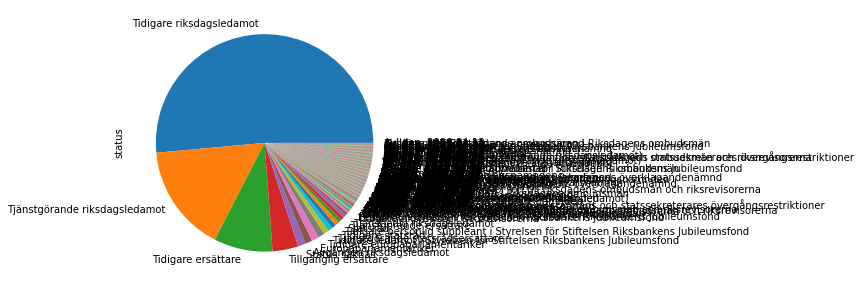

In [18]:
%matplotlib inline  
import matplotlib.pyplot as plt   
plot = df["status"].value_counts().plot.pie(y='counts', figsize=(5, 5))  
plt.show()

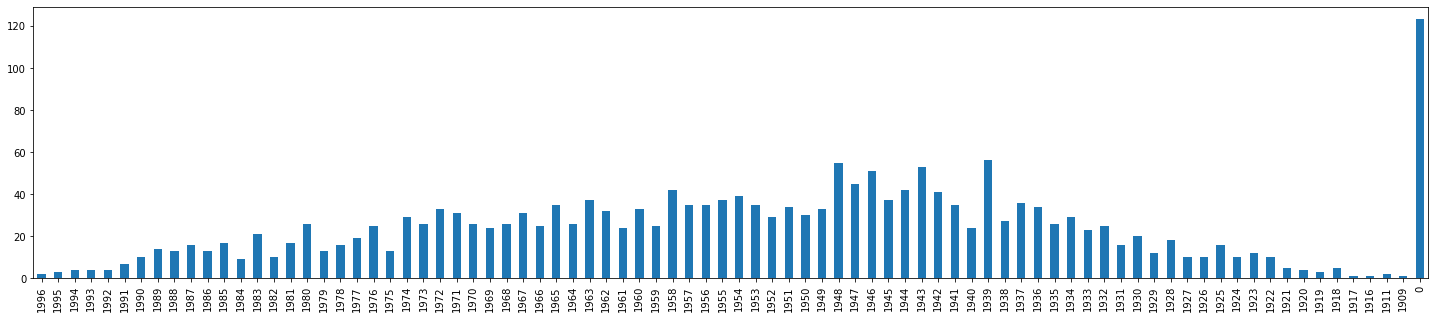

In [19]:
plot = df.fodd_ar.value_counts().sort_index(ascending=False).plot.bar(y='counts', figsize=(25, 5))  
plt.show()

In [20]:
df.iort.value_counts()

               1987
Stockholm         2
Bengtsfors        1
Gamleby           1
Linköping         1
Stockaryd         1
Skellefteå        1
Uppsala           1
Helsingborg       1
Göteborg          1
Norrhult          1
Stjärnhov         1
Simrishamn        1
Röstånga          1
Gislaved          1
Luleå             1
Visby             1
Degerhamn         1
Hallsberg         1
Name: iort, dtype: int64

### Compare WD - P8388 = Riksdagen person GUID

In [21]:
# pip install sparqlwrapper
# https://rdflib.github.io/sparqlwrapper/

import sys,json
import pandas as pd 

from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"

querySKBL = """SELECT (REPLACE(STR(?item), ".*Q", "Q") AS ?WikidataID)  ?riksdagenGUID  WHERE {
?item wdt:P8388 ?riksdagenGUID
}"""

def get_sparql_dataframe(endpoint_url, query):
    """
    Helper function to convert SPARQL results into a Pandas data frame.
    """
    user_agent = "salgo60/%s.%s" % (sys.version_info[0], sys.version_info[1])
 
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    result = sparql.query()

    processed_results = json.load(result.response)
    cols = processed_results['head']['vars']

    out = []
    for row in processed_results['results']['bindings']:
        item = []
        for c in cols:
            item.append(row.get(c, {}).get('value'))
        out.append(item)

    return pd.DataFrame(out, columns=cols)

WDP8388 = get_sparql_dataframe(endpoint_url, querySKBL)
WDP8388["Source"] = "PropertyP8388" 

In [22]:
WDP8388.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1771 entries, 0 to 1770
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   WikidataID     1771 non-null   object
 1   riksdagenGUID  1771 non-null   object
 2   Source         1771 non-null   object
dtypes: object(3)
memory usage: 41.6+ KB


In [23]:
WDP8388.sample(10)

,WikidataID,riksdagenGUID,Source
1396,Q18202340,6f818cd1-9a97-412f-bc59-1d1e8a2ceb19,PropertyP8388
286,Q4693160,d7c32122-83e4-11d4-ae60-0050040c9b55,PropertyP8388
305,Q262285,d7c324dd-83e4-11d4-ae60-0050040c9b55,PropertyP8388
345,Q3271292,636f5ecf-8acd-4056-b7c5-85895178d03b,PropertyP8388
1556,Q18238731,cf98df89-2103-40cc-8524-b2df33125a3f,PropertyP8388
1137,Q6009898,86755f1a-1802-46b6-8dc3-97aade16dccb,PropertyP8388
1200,Q6175642,30fbf1de-3831-44fd-93f7-eb5ef4301bf1,PropertyP8388
1035,Q5881540,d580453d-2452-494c-8efd-03cf62600281,PropertyP8388
1372,Q6256695,d7c31fad-83e4-11d4-ae60-0050040c9b55,PropertyP8388
140,Q56164156,1d7d8c9a-7879-4be3-8554-745991b615d2,PropertyP8388


### Compare Riksdagen <-> WD 

In [24]:
#WDP1214 <-> df
mergeRiksdagenWD = pd.merge(WDP8388, df,how='outer', left_on='riksdagenGUID', right_on='sourceid',indicator=True)   
mergeRiksdagenWD.rename(columns={"_merge": "WD_Riksdagen"},inplace = True)
mergeRiksdagenWD['WD_Riksdagen'] = mergeRiksdagenWD['WD_Riksdagen'].str.replace('left_only','WD_only').str.replace('right_only','Riksdagen_only')
mergeRiksdagenWD["WD_Riksdagen"].value_counts()  
mergeRiksdagenWD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2008 entries, 0 to 2007
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   WikidataID      1771 non-null   object
 1   riksdagenGUID   1771 non-null   object
 2   Source          1771 non-null   object
 3   hangar_guid     2006 non-null   object
 4   sourceid        2006 non-null   object
 5   intressent_id   2006 non-null   object
 6   hangar_id       2006 non-null   object
 7   fodd_ar         2006 non-null   object
 8   kon             2006 non-null   object
 9   efternamn       2006 non-null   object
 10  tilltalsnamn    2006 non-null   object
 11  sorteringsnamn  2006 non-null   object
 12  iort            2006 non-null   object
 13  parti           2006 non-null   object
 14  valkrets        2006 non-null   object
 15  status          2006 non-null   object
 16  person_url_xml  2006 non-null   object
 17  bild_url_80     2006 non-null   object
 18  bild_url

In [33]:
mergeRiksdagenWD["WD_Riksdagen"].value_counts() 

both              1769
Riksdagen_only     237
WD_only              2
Name: WD_Riksdagen, dtype: int64

In [25]:
mergeCheck = mergeRiksdagenWD[['WikidataID', 'riksdagenGUID','Source','sourceid','WD_Riksdagen','tilltalsnamn','efternamn','parti']] 

In [34]:
Riksdagen_only = mergeCheck[mergeCheck["WD_Riksdagen"] == "Riksdagen_only"].copy() 

In [35]:
Riksdagen_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237 entries, 1771 to 2007
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   WikidataID     0 non-null      object
 1   riksdagenGUID  0 non-null      object
 2   Source         0 non-null      object
 3   sourceid       237 non-null    object
 4   WD_Riksdagen   237 non-null    object
 5   tilltalsnamn   237 non-null    object
 6   efternamn      237 non-null    object
 7   parti          237 non-null    object
dtypes: object(8)
memory usage: 16.7+ KB


In [36]:
pd.set_option('display.max_rows', None) 
#Riksdagen_only

In [37]:
from IPython.display import display, HTML   
Riksdagen_only["Riksdagen"] = "<a href='https://www.riksdagen.se/sv/ledamoter-partier/ledamot/_" + Riksdagen_only['sourceid'].astype(str) + "'>link</a>"
Riksdagen_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237 entries, 1771 to 2007
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   WikidataID     0 non-null      object
 1   riksdagenGUID  0 non-null      object
 2   Source         0 non-null      object
 3   sourceid       237 non-null    object
 4   WD_Riksdagen   237 non-null    object
 5   tilltalsnamn   237 non-null    object
 6   efternamn      237 non-null    object
 7   parti          237 non-null    object
 8   Riksdagen      237 non-null    object
dtypes: object(9)
memory usage: 18.5+ KB


In [39]:
HTML(Riksdagen_only[{'tilltalsnamn','efternamn','parti','WikidataID','Riksdagen'}].to_html(escape=False))


,Riksdagen,WikidataID,efternamn,tilltalsnamn,parti
1771,link,NaN,Agenberg,Tomas,S
1772,link,NaN,Ahlström Köster,Emma,M
1773,link,NaN,Andersson,Christina,C
1774,link,NaN,Andersson,Elisabeth,C
1775,link,NaN,Andersson,Gunilla,S
1776,link,NaN,Andersson,Hans-Eric,S
1777,link,NaN,Andersson,Jenny,
1778,link,NaN,Andersson,Johan,S
1779,link,NaN,Andersson,Mari,
1780,link,NaN,André,Kerstin,


In [40]:
Riksdagen_only["parti"].value_counts() 

      104
S      48
M      27
C      19
V      13
MP     12
KD      7
FP      3
SD      2
FI      1
-       1
Name: parti, dtype: int64

In [41]:
end = datetime.now()
print("Ended: ", end) 
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

Ended:  2020-12-16 21:27:17.640239
Time elapsed (hh:mm:ss.ms) 0:04:38.689968
